In [2]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
def runs(lst):
    "Iterator, chunks repeated values"
    for j,two in enumerate(lst):
        if j == 0:
            one,i = two,0
        if one!=two:
            yield j - i,one
            i = j
        one=two
    yield j - i + 1,two
def cliffsDelta(lst1,lst2): 
    "Returns true if there are more than 'dull' differences"
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats,x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] <  x: 
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x: 
            j += 1
        less += (n - j)*repeats
    d= (more - less) / (m*n) 
    return abs(d)

In [4]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 4 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [5]:
def add_percentage(plot, feature):
    #total = len(feature)
    for p in ax.patches:
        percentage = '{:.11}%'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [9]:
dl_type1 = pd.read_csv('clone_data/dl_type1.csv')
dl_type2 = pd.read_csv('clone_data/dl_type2.csv')
dl_type3 = pd.read_csv('clone_data/dl_type3.csv')

In [10]:
dl_type1['clone_type']='Type 1'
dl_type2['clone_type']='Type 2'
dl_type3['clone_type']='Type 3'

In [11]:
dl_all_clones = pd.concat([dl_type1,dl_type2])
dl_all_clones = pd.concat([dl_all_clones,dl_type3])

In [12]:
trad_type1 = pd.read_csv('clone_data/trad_type1.csv')
trad_type2 = pd.read_csv('clone_data/trad_type2.csv')
trad_type3 = pd.read_csv('clone_data/trad_type3.csv')

In [13]:
trad_type1['clone_type']='Type 1'
trad_type2['clone_type']='Type 2'
trad_type3['clone_type']='Type 3'

In [14]:
trad_all_clones = pd.concat([trad_type1,trad_type2])
trad_all_clones = pd.concat([trad_all_clones,trad_type3])

In [15]:
dl_all_clones['project_type']='Deep Learning'
trad_all_clones['project_type']='Traditional'

In [16]:
repos_size = pd.read_csv("data/slocs_data.csv")

In [17]:
all_clones = pd.concat([dl_all_clones,trad_all_clones])

In [18]:
all_clones

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,29,48,73,100,blocks,Type 1,Deep Learning
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,42,61,695,100,blocks,Type 1,Deep Learning
2,adanet,2,../clone_code/dl/adanet/adanet/core/evaluator_...,121,126,204,100,blocks,Type 1,Deep Learning
3,adanet,2,../clone_code/dl/adanet/adanet/core/evaluator_...,140,145,208,100,blocks,Type 1,Deep Learning
4,adanet,3,../clone_code/dl/adanet/adanet/core/testing_ut...,43,49,477,100,blocks,Type 1,Deep Learning
...,...,...,...,...,...,...,...,...,...,...
39479,yowsup,77,../clone_code/trad/yowsup/yowsup/axolotl/store...,59,66,1754,87,functions-blind,Type 3,Traditional
39480,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,50,55,1740,71,functions-blind,Type 3,Traditional
39481,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,67,72,1755,71,functions-blind,Type 3,Traditional
39482,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,56,60,1741,71,functions-blind,Type 3,Traditional


In [19]:
def get_locc(row):
    startline=row['startline']
    endline = row['endline']
    return endline - startline

In [20]:
all_clones['locc']=all_clones.apply(get_locc, axis=1)

In [21]:
def update_granularity(row):
    granularity=row['granularity']
    if 'block' in granularity:
        return 'Block'
    elif 'function' in granularity:
        return 'Function'

In [22]:
all_clones['granularity']=all_clones.apply(update_granularity, axis=1)

In [23]:
trad_class= pd.read_csv('data/trad_class_categorized.csv')
dl_class= pd.read_csv('data/dl_class_categorized.csv')

In [24]:
all_clones_class = pd.concat([dl_class,trad_class])

In [25]:
all_clones_class['clone_type'] = all_clones_class['clone_type'].str.capitalize()

In [26]:
all_clones_class[['repoName','classid','similarity','nb_fragment','granularity','clone_type','project_type','category']]

,repoName,classid,similarity,nb_fragment,granularity,clone_type,project_type,category
0,BerryNet,1,100,2,Block,Type 1,Deep Learning,1
1,BerryNet,1,100,2,Function,Type 1,Deep Learning,1
2,BerryNet,2,100,6,Block,Type 1,Deep Learning,1
3,BerryNet,2,100,2,Function,Type 1,Deep Learning,1
4,BerryNet,3,100,5,Block,Type 1,Deep Learning,1
...,...,...,...,...,...,...,...,...
12390,yowsup,74,83,2,Function,Type 3,Traditional,0
12391,yowsup,75,75,3,Function,Type 3,Traditional,1
12392,yowsup,76,75,4,Function,Type 3,Traditional,1
12393,yowsup,77,87,2,Function,Type 3,Traditional,1


In [27]:
all_clones_class_fct = all_clones_class[['repoName','classid','similarity','nb_fragment','granularity','clone_type','project_type','category']]

In [28]:
all_clones_class_fct =all_clones_class_fct[all_clones_class_fct['granularity']=='Function']

In [29]:
all_clones_fct = all_clones[all_clones['granularity']=='Function']

In [30]:
all_clones_categorized_fct = pd.merge(all_clones_fct,all_clones_class_fct,how='left', on=['repoName','classid','similarity','granularity','clone_type','project_type'])

In [31]:
all_clones_categorized_fct[all_clones_categorized_fct['category']==2]

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,42,48,41,100,Function,Type 1,Deep Learning,6,2.0,2.0
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,55,61,299,100,Function,Type 1,Deep Learning,6,2.0,2.0
2,adanet,2,../clone_code/dl/adanet/adanet/core/testing_ut...,42,49,216,100,Function,Type 1,Deep Learning,7,2.0,2.0
3,adanet,2,../clone_code/dl/adanet/adanet/subnetwork/gene...,29,36,284,100,Function,Type 1,Deep Learning,7,2.0,2.0
32,auto,2,../clone_code/dl/auto_ml/tests/utils_testing.p...,12,19,82,100,Function,Type 1,Deep Learning,7,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51512,yowsup,66,../clone_code/trad/yowsup/yowsup/layers/protoc...,9,12,1415,80,Function,Type 3,Traditional,3,3.0,2.0
51513,yowsup,66,../clone_code/trad/yowsup/yowsup/layers/interf...,69,72,1454,80,Function,Type 3,Traditional,3,3.0,2.0
51514,yowsup,66,../clone_code/trad/yowsup/yowsup/layers/protoc...,13,15,1416,80,Function,Type 3,Traditional,2,3.0,2.0
51515,yowsup,67,../clone_code/trad/yowsup/yowsup/layers/interf...,76,83,1456,73,Function,Type 3,Traditional,7,2.0,2.0


In [49]:
all_clones_categorized_fct[all_clones_categorized_fct['repoName']=='gluon-cv']#.to_csv('data/gluon.csv')

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category
554,gluon-cv,1,../clone_code/dl/gluon-cv/scripts/classificati...,111,119,3,100,Function,Type 1,Deep Learning,8,3.0,1.0
555,gluon-cv,1,../clone_code/dl/gluon-cv/docs/tutorials/class...,218,242,1769,100,Function,Type 1,Deep Learning,24,3.0,1.0
556,gluon-cv,1,../clone_code/dl/gluon-cv/scripts/classificati...,134,142,8,100,Function,Type 1,Deep Learning,8,3.0,1.0
557,gluon-cv,2,../clone_code/dl/gluon-cv/scripts/classificati...,91,100,11,100,Function,Type 1,Deep Learning,9,2.0,2.0
558,gluon-cv,2,../clone_code/dl/gluon-cv/docs/tutorials/class...,226,249,1770,100,Function,Type 1,Deep Learning,23,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12239,gluon-cv,169,../clone_code/dl/gluon-cv/tests/unittests/test...,72,84,1763,80,Function,Type 3,Deep Learning,12,6.0,0.0
12240,gluon-cv,169,../clone_code/dl/gluon-cv/tests/unittests/test...,85,96,1764,80,Function,Type 3,Deep Learning,11,6.0,0.0
12241,gluon-cv,169,../clone_code/dl/gluon-cv/tests/unittests/test...,97,108,1765,80,Function,Type 3,Deep Learning,11,6.0,0.0
12242,gluon-cv,170,../clone_code/dl/gluon-cv/tests/unittests/test...,121,142,1767,100,Function,Type 3,Deep Learning,21,NaN,NaN


In [32]:
all_clones_categorized_size_fct = pd.merge(all_clones_categorized_fct,repos_size[['repoName','total_sloc']],how='left', on=['repoName'])

In [36]:
all_clones_categorized_size_fct

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,location
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,42,48,41,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,Different directories
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,55,61,299,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,Different directories
2,adanet,2,../clone_code/dl/adanet/adanet/core/testing_ut...,42,49,216,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,Different directories
3,adanet,2,../clone_code/dl/adanet/adanet/subnetwork/gene...,29,36,284,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,Different directories
4,adanet,3,../clone_code/dl/adanet/adanet/experimental/ke...,114,128,342,100,Function,Type 1,Deep Learning,14,2.0,0.0,8096.0,Same file
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,yowsup,77,../clone_code/trad/yowsup/yowsup/axolotl/store...,59,66,1754,87,Function,Type 3,Traditional,7,2.0,1.0,11423.0,Same directory
51540,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,50,55,1740,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,Same directory
51541,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,67,72,1755,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,Same directory
51542,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,56,60,1741,71,Function,Type 3,Traditional,4,4.0,1.0,11423.0,Same directory


## Fragments

In [37]:
clone_frag_proj = all_clones_categorized_size_fct.groupby(['repoName','project_type','location']).agg({'nb_fragment':'count'}).reset_index()

In [39]:
clone_frag_proj_total = clone_frag_proj.groupby(['repoName','project_type']).agg({'nb_fragment':'sum'}).reset_index()

In [40]:
clone_frag_proj_total=clone_frag_proj_total.rename(columns={"nb_fragment": "total_fragments"})

In [41]:
clone_frag_proj = pd.merge(clone_frag_proj,clone_frag_proj_total[['repoName','total_fragments']],how='left', on=['repoName'])

In [42]:
clone_frag_proj['percentage']=(clone_frag_proj['nb_fragment']/clone_frag_proj['total_fragments'])*100

In [43]:
clone_frag_proj

,repoName,project_type,location,nb_fragment,total_fragments,percentage
0,BerryNet,Deep Learning,Different directories,48,167,28.742515
1,BerryNet,Deep Learning,Same directory,105,167,62.874251
2,BerryNet,Deep Learning,Same file,14,167,8.383234
3,CommonMark,Traditional,Same file,2,2,100.000000
4,DeepCTR,Deep Learning,Same directory,78,99,78.787879
...,...,...,...,...,...,...
291,yapf,Traditional,Same directory,90,226,39.823009
292,yapf,Traditional,Same file,131,226,57.964602
293,yowsup,Traditional,Different directories,289,635,45.511811
294,yowsup,Traditional,Same directory,270,635,42.519685


In [45]:
avg=clone_frag_proj.groupby(['project_type','location']).agg({'percentage':'mean'}).reset_index()

In [47]:
clone_frag_proj

,repoName,project_type,location,nb_fragment,total_fragments,percentage
0,BerryNet,Deep Learning,Different directories,48,167,28.742515
1,BerryNet,Deep Learning,Same directory,105,167,62.874251
2,BerryNet,Deep Learning,Same file,14,167,8.383234
3,CommonMark,Traditional,Same file,2,2,100.000000
4,DeepCTR,Deep Learning,Same directory,78,99,78.787879
...,...,...,...,...,...,...
291,yapf,Traditional,Same directory,90,226,39.823009
292,yapf,Traditional,Same file,131,226,57.964602
293,yowsup,Traditional,Different directories,289,635,45.511811
294,yowsup,Traditional,Same directory,270,635,42.519685


In [46]:
avg

,project_type,location,percentage
0,Deep Learning,Different directories,26.242321
1,Deep Learning,Same directory,33.217900
2,Deep Learning,Same file,49.892604
3,Traditional,Different directories,28.299017
4,Traditional,Same directory,25.856752
5,Traditional,Same file,59.109142


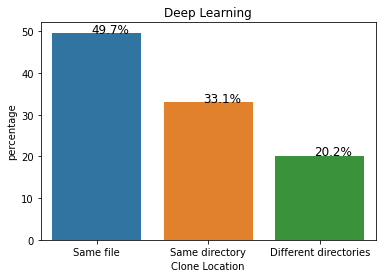

In [8]:
df = pd.DataFrame()
df['percentage'] = pd.Series([49.7, 33.1, 20.2 ])
df['Clone Location'] = pd.Series(['Same file', 'Same directory', 'Different directories'])
ax= sns.barplot(x='Clone Location',y='percentage',data=df)
ax.set_title("Deep Learning")
add_percentage(ax,df.percentage)

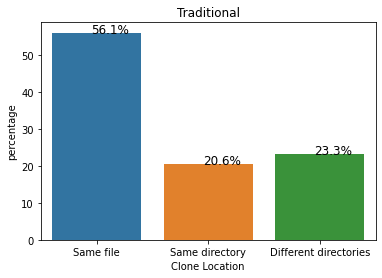

In [9]:
df = pd.DataFrame()
df['percentage'] = pd.Series([56.1,20.6, 23.3 ])
df['Clone Location'] = pd.Series(['Same file', 'Same directory', 'Different directories'])
ax= sns.barplot(x='Clone Location',y='percentage',data=df)
ax.set_title('Traditional')
add_percentage(ax,df.percentage)

## LOCC

In [33]:
clone_size_proj = all_clones_categorized_size_fct.groupby(['repoName','project_type']).agg({'locc':'sum'}).reset_index()

In [37]:
clone_size_proj=clone_size_proj.rename(columns={"locc": "total_locc"})

In [39]:
all_clones_categorized_size_fct = pd.merge(all_clones_categorized_size_fct,clone_size_proj[['repoName','total_locc']],how='left', on=['repoName'])

In [40]:
all_clones_categorized_size_fct

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,total_locc
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,42,48,41,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,55,61,299,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379
2,adanet,2,../clone_code/dl/adanet/adanet/core/testing_ut...,42,49,216,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379
3,adanet,2,../clone_code/dl/adanet/adanet/subnetwork/gene...,29,36,284,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379
4,adanet,3,../clone_code/dl/adanet/adanet/experimental/ke...,114,128,342,100,Function,Type 1,Deep Learning,14,2.0,0.0,8096.0,2379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,yowsup,77,../clone_code/trad/yowsup/yowsup/axolotl/store...,59,66,1754,87,Function,Type 3,Traditional,7,2.0,1.0,11423.0,3490
51540,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,50,55,1740,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490
51541,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,67,72,1755,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490
51542,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,56,60,1741,71,Function,Type 3,Traditional,4,4.0,1.0,11423.0,3490


In [34]:
def get_category_name(row):
    if row['category']==0:
        return 'Same file'
    elif  row['category']==1:
        return 'Same directory'
    elif row['category']==2:
        return 'Different directories'

In [35]:
all_clones_categorized_size_fct['location']= all_clones_categorized_size_fct.apply(get_category_name, axis=1)

In [43]:
all_clones_categorized_size_fct.to_csv('data/all_clones_categorized_size_fct.csv', index=False)

In [44]:
all_clones_categorized_size.to_csv('data/all_clones_location_taxonomy.csv', index=False)

In [54]:
all_clones_categorized_size_fct = all_clones_categorized_size[all_clones_categorized_size['granularity']=='Function']

In [44]:
clones_by_loc_fct = all_clones_categorized_size_fct.groupby(['repoName','project_type','location','total_locc']).agg({'locc':'sum'}).reset_index()

In [46]:
clones_by_loc_fct['percentage']=(clones_by_loc_fct['locc']/clones_by_loc_fct['total_locc'])*100

In [47]:
clones_by_loc_fct

,repoName,project_type,location,total_locc,locc,percentage
0,BerryNet,Deep Learning,Different directories,3026,389,12.855254
1,BerryNet,Deep Learning,Same directory,3026,1552,51.288830
2,BerryNet,Deep Learning,Same file,3026,52,1.718440
3,CommonMark,Traditional,Same file,8,4,50.000000
4,DeepCTR,Deep Learning,Same directory,6044,3128,51.753805
...,...,...,...,...,...,...
291,yapf,Traditional,Same directory,2786,879,31.550610
292,yapf,Traditional,Same file,2786,1853,66.511127
293,yowsup,Traditional,Different directories,3490,1252,35.873926
294,yowsup,Traditional,Same directory,3490,1613,46.217765


In [57]:
clones_by_loc_fct['LOCC_total_SLOC'] = clones_by_loc_fct['locc']/clones_by_loc_fct['total_sloc']

[Text(0, 0.5, 'LOCC / total LOCC %'), Text(0.5, 0, 'Project Type')]

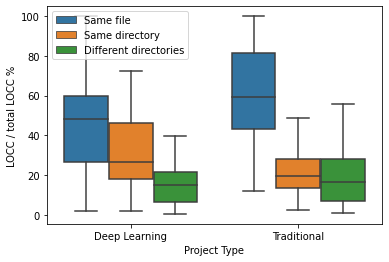

In [67]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=clones_by_loc_fct,
                              showfliers=False,hue="location",
                              hue_order= ['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best')
ml_trad_boxplot.set(xlabel='Project Type', ylabel='LOCC / total LOCC %')
#plt.title('Taxonomy by Location and Function granularity for DL and Traditional Code')

In [49]:
same_file_fct=clones_by_loc_fct[clones_by_loc_fct['location']=='Same file']
same_directory_fct = clones_by_loc_fct[clones_by_loc_fct['location']=='Same directory']
different_directories_fct = clones_by_loc_fct[clones_by_loc_fct['location']=='Different directories']

In [50]:
same_file_fct_dl = same_file_fct[same_file_fct['project_type'] == 'Deep Learning']
same_file_fct_trad = same_file_fct[same_file_fct['project_type'] == 'Traditional']

In [51]:
stats.mannwhitneyu(same_file_fct_dl.locc,same_file_fct_trad.locc)

MannwhitneyuResult(statistic=1432.5, pvalue=0.2696092734222158)

In [52]:
cliffsDelta(same_file_fct_dl.locc,same_file_fct_trad.locc)

0.06798959011060507

In [53]:
same_directory_fct_dl = same_directory_fct[same_directory_fct['project_type'] == 'Deep Learning']
same_directory_fct_trad = same_directory_fct[same_directory_fct['project_type'] == 'Traditional']

In [54]:
stats.mannwhitneyu(same_directory_fct_dl.locc,same_directory_fct_trad.locc)

MannwhitneyuResult(statistic=958.5, pvalue=0.0831825969044176)

In [55]:
cliffsDelta(same_directory_fct_dl.locc,same_directory_fct_trad.locc)

0.16470588235294117

In [56]:
different_directories_fct_dl = different_directories_fct[different_directories_fct['project_type'] == 'Deep Learning']
different_directories_fct_trad = different_directories_fct[different_directories_fct['project_type'] == 'Traditional']

In [57]:
stats.mannwhitneyu(different_directories_fct_dl.locc,different_directories_fct_trad.locc)

MannwhitneyuResult(statistic=948.5, pvalue=0.4148829670926566)

In [58]:
cliffsDelta(different_directories_fct_dl.locc,different_directories_fct_trad.locc)

0.02717948717948718

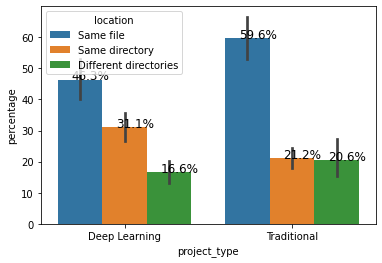

In [73]:
ax= sns.barplot(x='project_type',y='percentage',data=clones_by_loc_fct, hue='location',hue_order= ['Same file', 'Same directory', 'Different directories'])
add_percentage(ax,clones_by_loc_fct.percentage)

In [75]:
dl_clones_by_loc_fct=clones_by_loc_fct[clones_by_loc_fct['project_type']=='Deep Learning']
trad_clones_by_loc_fct=clones_by_loc_fct[clones_by_loc_fct['project_type']=='Traditional']


In [76]:
dl_clones_by_loc_fct

,repoName,project_type,location,total_locc,locc,percentage
0,BerryNet,Deep Learning,Different directories,3026,389,12.855254
1,BerryNet,Deep Learning,Same directory,3026,1552,51.288830
2,BerryNet,Deep Learning,Same file,3026,52,1.718440
4,DeepCTR,Deep Learning,Same directory,6044,3128,51.753805
5,DeepCTR,Deep Learning,Same file,6044,300,4.963600
...,...,...,...,...,...,...
273,tflearn,Deep Learning,Different directories,4948,384,7.760711
274,tflearn,Deep Learning,Same directory,4948,1436,29.021827
275,tflearn,Deep Learning,Same file,4948,2672,54.001617
285,waifu2x-chainer,Deep Learning,Different directories,199,43,21.608040


In [78]:
dl_sd=dl_clones_by_loc_fct[dl_clones_by_loc_fct['location']=='Same directory'].locc.sum()

In [79]:
dl_sf=dl_clones_by_loc_fct[dl_clones_by_loc_fct['location']=='Same file'].locc.sum()

In [80]:
dl_dd=dl_clones_by_loc_fct[dl_clones_by_loc_fct['location']=='Different directories'].locc.sum()

In [82]:
dl_total=dl_clones_by_loc_fct.locc.sum()

In [83]:
print('same file',dl_sf/dl_total,'same directory',dl_sd/dl_total, 'different directories',dl_dd/dl_total)

same file 0.4579301407280916 same directory 0.33003619336061263 different directories 0.21203366591129583


In [84]:
trad_sd=trad_clones_by_loc_fct[trad_clones_by_loc_fct['location']=='Same directory'].locc.sum()

In [85]:
trad_sf=trad_clones_by_loc_fct[trad_clones_by_loc_fct['location']=='Same file'].locc.sum()

In [86]:
trad_dd=trad_clones_by_loc_fct[trad_clones_by_loc_fct['location']=='Different directories'].locc.sum()

In [87]:
trad_total=trad_clones_by_loc_fct.locc.sum()

In [88]:
print('same file',trad_sf/trad_total,'same directory',trad_sd/dl_total, 'different directories',trad_dd/trad_total)

same file 0.5521605818596691 same directory 0.16546559124772225 different directories 0.21242665634422622


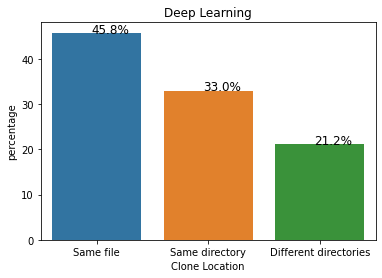

In [96]:
df = pd.DataFrame()
df['percentage'] = pd.Series([45.79, 33, 21.2 ])
df['Clone Location'] = pd.Series(['Same file', 'Same directory', 'Different directories'])
ax= sns.barplot(x='Clone Location',y='percentage',data=df)
ax.set_title("Deep Learning")
add_percentage(ax,df.percentage)

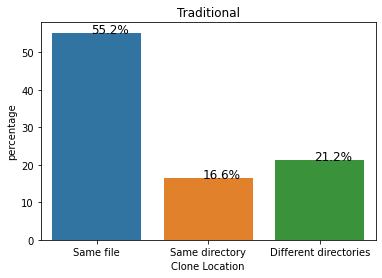

In [97]:
df = pd.DataFrame()
df['percentage'] = pd.Series([55.22, 16.55, 21.24 ])
df['Clone Location'] = pd.Series(['Same file', 'Same directory', 'Different directories'])
ax= sns.barplot(x='Clone Location',y='percentage',data=df)
ax.set_title('Traditional')
add_percentage(ax,df.percentage)

## By Clone type

In [98]:
all_clones_categorized_size_fct

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,total_locc,location
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,42,48,41,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,55,61,299,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories
2,adanet,2,../clone_code/dl/adanet/adanet/core/testing_ut...,42,49,216,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories
3,adanet,2,../clone_code/dl/adanet/adanet/subnetwork/gene...,29,36,284,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories
4,adanet,3,../clone_code/dl/adanet/adanet/experimental/ke...,114,128,342,100,Function,Type 1,Deep Learning,14,2.0,0.0,8096.0,2379,Same file
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,yowsup,77,../clone_code/trad/yowsup/yowsup/axolotl/store...,59,66,1754,87,Function,Type 3,Traditional,7,2.0,1.0,11423.0,3490,Same directory
51540,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,50,55,1740,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory
51541,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,67,72,1755,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory
51542,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,56,60,1741,71,Function,Type 3,Traditional,4,4.0,1.0,11423.0,3490,Same directory


In [99]:
clones_by_loc_fct_cloneType = all_clones_categorized_size_fct.groupby(['repoName','project_type','location','clone_type','total_locc']).agg({'locc':'sum'}).reset_index()

In [100]:
clones_by_loc_fct_cloneType

,repoName,project_type,location,clone_type,total_locc,locc
0,BerryNet,Deep Learning,Different directories,Type 1,3026,188
1,BerryNet,Deep Learning,Different directories,Type 3,3026,201
2,BerryNet,Deep Learning,Same directory,Type 1,3026,430
3,BerryNet,Deep Learning,Same directory,Type 2,3026,168
4,BerryNet,Deep Learning,Same directory,Type 3,3026,954
...,...,...,...,...,...,...
668,yowsup,Traditional,Different directories,Type 3,3490,1150
669,yowsup,Traditional,Same directory,Type 2,3490,190
670,yowsup,Traditional,Same directory,Type 3,3490,1423
671,yowsup,Traditional,Same file,Type 2,3490,194


In [104]:
clone_size_proj_per_location = clones_by_loc_fct_cloneType.groupby(['repoName','project_type','location']).agg({'locc':'sum'}).reset_index()

In [105]:
clone_size_proj_per_location=clone_size_proj_per_location.rename(columns={"locc": "total_locc_per_location"})

In [106]:
clone_size_proj_per_location

,repoName,project_type,location,total_locc_per_location
0,BerryNet,Deep Learning,Different directories,389
1,BerryNet,Deep Learning,Same directory,1552
2,BerryNet,Deep Learning,Same file,52
3,CommonMark,Traditional,Same file,4
4,DeepCTR,Deep Learning,Same directory,3128
...,...,...,...,...
291,yapf,Traditional,Same directory,879
292,yapf,Traditional,Same file,1853
293,yowsup,Traditional,Different directories,1252
294,yowsup,Traditional,Same directory,1613


In [110]:
all_clones_by_loc_fct_cloneType = pd.merge(clones_by_loc_fct_cloneType,clone_size_proj_per_location[['repoName','location','project_type','total_locc_per_location']],how='left', on=['repoName','location','project_type'])

In [112]:
all_clones_by_loc_fct_cloneType['percentage']=(all_clones_by_loc_fct_cloneType['locc']/all_clones_by_loc_fct_cloneType['total_locc_per_location'])*100

In [113]:
all_clones_by_loc_fct_cloneType

,repoName,project_type,location,clone_type,total_locc,locc,total_locc_per_location,percentage
0,BerryNet,Deep Learning,Different directories,Type 1,3026,188,389,48.329049
1,BerryNet,Deep Learning,Different directories,Type 3,3026,201,389,51.670951
2,BerryNet,Deep Learning,Same directory,Type 1,3026,430,1552,27.706186
3,BerryNet,Deep Learning,Same directory,Type 2,3026,168,1552,10.824742
4,BerryNet,Deep Learning,Same directory,Type 3,3026,954,1552,61.469072
...,...,...,...,...,...,...,...,...
668,yowsup,Traditional,Different directories,Type 3,3490,1150,1252,91.853035
669,yowsup,Traditional,Same directory,Type 2,3490,190,1613,11.779293
670,yowsup,Traditional,Same directory,Type 3,3490,1423,1613,88.220707
671,yowsup,Traditional,Same file,Type 2,3490,194,512,37.890625


In [114]:
same_file=all_clones_by_loc_fct_cloneType[all_clones_by_loc_fct_cloneType['location']=='Same file']
same_directory=all_clones_by_loc_fct_cloneType[all_clones_by_loc_fct_cloneType['location']=='Same directory']
different_directories=all_clones_by_loc_fct_cloneType[all_clones_by_loc_fct_cloneType['location']=='Different directories']

Text(0.5, 1.0, ' (A) Same File ')

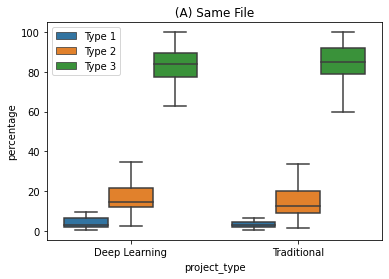

In [120]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=same_file, 
                              showfliers=False, hue='clone_type', hue_order=['Type 1', 'Type 2', 'Type 3'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best')
plt.title(' (A) Same File ')

Text(0.5, 1.0, ' (B) Same Directory ')

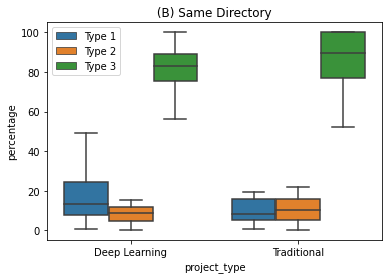

In [119]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", 
                              data=same_directory, showfliers=False, hue='clone_type', hue_order=['Type 1', 'Type 2', 'Type 3'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best')
plt.title(' (B) Same Directory ')

Text(0.5, 1.0, ' (C) Different Directories ')

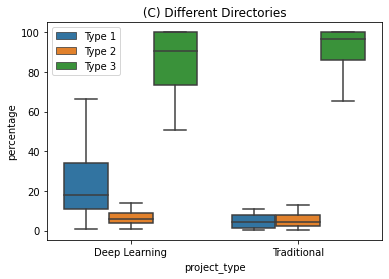

In [118]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=different_directories, 
                              showfliers=False, hue='clone_type', hue_order=['Type 1', 'Type 2', 'Type 3'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best')
plt.title(' (C) Different Directories ')

### by type 

In [121]:
Type1=all_clones_by_loc_fct_cloneType[all_clones_by_loc_fct_cloneType['clone_type']=='Type 1']
Type2=all_clones_by_loc_fct_cloneType[all_clones_by_loc_fct_cloneType['clone_type']=='Type 2']
Type3=all_clones_by_loc_fct_cloneType[all_clones_by_loc_fct_cloneType['clone_type']=='Type 3']

Text(0.5, 1.0, ' (A) Type 1 ')

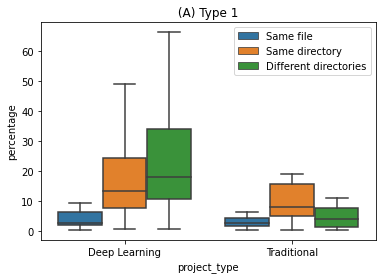

In [122]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=Type1, 
                              showfliers=False, hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best')
plt.title(' (A) Type 1 ')

Text(0.5, 1.0, ' (B) Type 2 ')

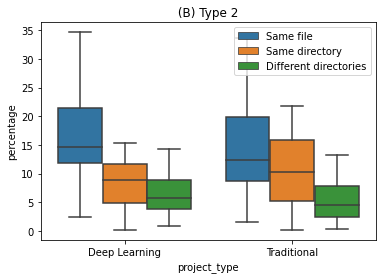

In [130]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=Type2, 
                              showfliers=False, hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='upper right')
plt.title(' (B) Type 2 ')

Text(0.5, 1.0, ' (C) Type 3 ')

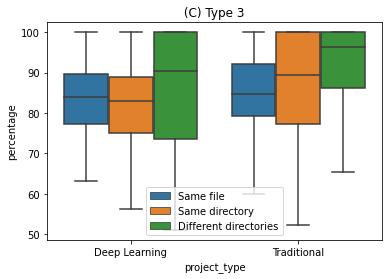

In [129]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=Type3, 
                              showfliers=False, hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='lower center')
plt.title(' (C) Type 3 ')

In [131]:
Type3

,repoName,project_type,location,clone_type,total_locc,locc,total_locc_per_location,percentage
1,BerryNet,Deep Learning,Different directories,Type 3,3026,201,389,51.670951
4,BerryNet,Deep Learning,Same directory,Type 3,3026,954,1552,61.469072
7,BerryNet,Deep Learning,Same file,Type 3,3026,18,52,34.615385
11,DeepCTR,Deep Learning,Same directory,Type 3,6044,1758,3128,56.202046
13,DeepCTR,Deep Learning,Same file,Type 3,6044,191,300,63.666667
...,...,...,...,...,...,...,...,...
662,yapf,Traditional,Same directory,Type 3,2786,879,879,100.000000
665,yapf,Traditional,Same file,Type 3,2786,1817,1853,98.057205
668,yowsup,Traditional,Different directories,Type 3,3490,1150,1252,91.853035
670,yowsup,Traditional,Same directory,Type 3,3490,1423,1613,88.220707


## Statistical Analysis

In [132]:
all_clones_by_loc_fct_cloneType

,repoName,project_type,location,clone_type,total_locc,locc,total_locc_per_location,percentage
0,BerryNet,Deep Learning,Different directories,Type 1,3026,188,389,48.329049
1,BerryNet,Deep Learning,Different directories,Type 3,3026,201,389,51.670951
2,BerryNet,Deep Learning,Same directory,Type 1,3026,430,1552,27.706186
3,BerryNet,Deep Learning,Same directory,Type 2,3026,168,1552,10.824742
4,BerryNet,Deep Learning,Same directory,Type 3,3026,954,1552,61.469072
...,...,...,...,...,...,...,...,...
668,yowsup,Traditional,Different directories,Type 3,3490,1150,1252,91.853035
669,yowsup,Traditional,Same directory,Type 2,3490,190,1613,11.779293
670,yowsup,Traditional,Same directory,Type 3,3490,1423,1613,88.220707
671,yowsup,Traditional,Same file,Type 2,3490,194,512,37.890625


In [133]:
DL = all_clones_by_loc_fct_cloneType[all_clones_by_loc_fct_cloneType['project_type']=='Deep Learning']
Trad = all_clones_by_loc_fct_cloneType[all_clones_by_loc_fct_cloneType['project_type']=='Traditional']

In [137]:
DL_SF = DL[DL['location']=='Same file']
DL_SD = DL[DL['location']=='Same directory']
DL_DD = DL[DL['location']=='Different directories']

Trad_SF = Trad[Trad['location']=='Same file']
Trad_SD = Trad[Trad['location']=='Same directory']
Trad_DD = Trad[Trad['location']=='Different directories']

In [150]:
stats.mannwhitneyu(DL_SF.percentage,DL_SD.percentage)

MannwhitneyuResult(statistic=8415.0, pvalue=0.4983516804314884)

In [144]:
cliffsDelta(DL_SF.percentage,DL_SD.percentage)

0.0003563791874554526

In [147]:
stats.mannwhitneyu(Trad_SF.percentage,Trad_SD.percentage)

MannwhitneyuResult(statistic=5589.0, pvalue=0.05041404700322687)

In [148]:
cliffsDelta(Trad_SF.percentage,Trad_SD.percentage)

0.12699156513589505

In [151]:
stats.mannwhitneyu(DL_SF.percentage,DL_DD.percentage)

MannwhitneyuResult(statistic=6097.0, pvalue=0.04929762244848674)

In [152]:
cliffsDelta(DL_SF.percentage,DL_DD.percentage)

0.12512555603386424

In [153]:
stats.mannwhitneyu(Trad_SF.percentage,Trad_DD.percentage)

MannwhitneyuResult(statistic=5087.0, pvalue=0.18949656332856435)

In [154]:
cliffsDelta(Trad_SF.percentage,Trad_DD.percentage)

0.07137641474990873

In [155]:
stats.mannwhitneyu(DL_SD.percentage,DL_DD.percentage)

MannwhitneyuResult(statistic=5441.0, pvalue=0.06660567738151416)

In [156]:
cliffsDelta(DL_SD.percentage,DL_DD.percentage)

0.11686414543093654

In [157]:
stats.mannwhitneyu(Trad_SD.percentage,Trad_DD.percentage)

MannwhitneyuResult(statistic=3791.0, pvalue=0.25040553426706774)

In [158]:
cliffsDelta(Trad_SD.percentage,Trad_DD.percentage)

0.05825363308905726

### By clone types

In [159]:
DL_SF_1 = DL_SF[DL_SF['clone_type']=='Type 1']
DL_SF_2 = DL_SF[DL_SF['clone_type']=='Type 2']
DL_SF_3 = DL_SF[DL_SF['clone_type']=='Type 3']

DL_SD_1 = DL_SD[DL_SD['clone_type']=='Type 1']
DL_SD_2 = DL_SD[DL_SD['clone_type']=='Type 2']
DL_SD_3 = DL_SD[DL_SD['clone_type']=='Type 3']

DL_DD_1 = DL_DD[DL_DD['clone_type']=='Type 1']
DL_DD_2 = DL_DD[DL_DD['clone_type']=='Type 2']
DL_DD_3 = DL_DD[DL_DD['clone_type']=='Type 3']

Trad_SF_1 = Trad_SF[Trad_SF['clone_type']=='Type 1']
Trad_SF_2 = Trad_SF[Trad_SF['clone_type']=='Type 2']
Trad_SF_3 = Trad_SF[Trad_SF['clone_type']=='Type 3']

Trad_SD_1 = Trad_SD[Trad_SD['clone_type']=='Type 1']
Trad_SD_2 = Trad_SD[Trad_SD['clone_type']=='Type 2']
Trad_SD_3 = Trad_SD[Trad_SD['clone_type']=='Type 3']

Trad_DD_1 = Trad_DD[Trad_DD['clone_type']=='Type 1']
Trad_DD_2 = Trad_DD[Trad_DD['clone_type']=='Type 2']
Trad_DD_3 = Trad_DD[Trad_DD['clone_type']=='Type 3']

In [160]:
stats.mannwhitneyu(DL_SF_1.percentage,DL_SD_1.percentage)

MannwhitneyuResult(statistic=226.0, pvalue=2.1782056198809917e-06)

In [161]:
cliffsDelta(DL_SF_1.percentage,DL_SD_1.percentage)

0.6378205128205128

In [163]:
stats.mannwhitneyu(Trad_SF_1.percentage,Trad_SD_1.percentage)

MannwhitneyuResult(statistic=148.0, pvalue=2.621247099960629e-05)

In [162]:
cliffsDelta(Trad_SF_1.percentage,Trad_SD_1.percentage)

0.63

In [164]:
stats.mannwhitneyu(DL_SF_1.percentage,DL_DD_1.percentage)

MannwhitneyuResult(statistic=120.0, pvalue=6.089743369564735e-07)

In [165]:
cliffsDelta(DL_SF_1.percentage,DL_DD_1.percentage)

0.7321428571428571

In [167]:
stats.mannwhitneyu(DL_SD_1.percentage,DL_DD_1.percentage)

MannwhitneyuResult(statistic=423.0, pvalue=0.05970446586646043)

In [166]:
cliffsDelta(DL_SD_1.percentage,DL_DD_1.percentage)

0.22527472527472528

In [196]:
stats.mannwhitneyu(Trad_SD_3.percentage,Trad_DD_3.percentage)

MannwhitneyuResult(statistic=729.0, pvalue=0.08659143733388597)

In [195]:
cliffsDelta(Trad_SD_3.percentage,Trad_DD_3.percentage)

0.16923076923076924

In [189]:
stats.mannwhitneyu(DL_SF_3.percentage,DL_DD_3.percentage)

MannwhitneyuResult(statistic=1187.0, pvalue=0.07086364651979332)

In [190]:
cliffsDelta(DL_SF_3.percentage,DL_DD_3.percentage)

0.16467276565798733

### By Clone Type as a first filter

In [4]:
clones = pd.read_csv('data/all_clones_categorized_size_fct.csv')

In [5]:
clones = clones.dropna()

In [57]:
Type1 = clones[clones['clone_type']=='Type 1']
Type2 = clones[clones['clone_type']=='Type 2']
Type3 = clones[clones['clone_type']=='Type 3']

In [58]:
Type1

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,total_locc,location
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,42,48,41,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,55,61,299,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories
2,adanet,2,../clone_code/dl/adanet/adanet/core/testing_ut...,42,49,216,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories
3,adanet,2,../clone_code/dl/adanet/adanet/subnetwork/gene...,29,36,284,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories
4,adanet,3,../clone_code/dl/adanet/adanet/experimental/ke...,114,128,342,100,Function,Type 1,Deep Learning,14,2.0,0.0,8096.0,2379,Same file
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,yapf,1,../clone_code/trad/yapf/yapftests/file_resourc...,158,162,665,100,Function,Type 1,Traditional,4,2.0,0.0,15837.0,2786,Same file
26900,yowsup,1,../clone_code/trad/yowsup/yowsup/demos/echocli...,18,20,312,100,Function,Type 1,Traditional,2,3.0,2.0,11423.0,3490,Different directories
26901,yowsup,1,../clone_code/trad/yowsup/yowsup/demos/mediasi...,18,20,319,100,Function,Type 1,Traditional,2,3.0,2.0,11423.0,3490,Different directories
26902,yowsup,1,../clone_code/trad/yowsup/yowsup/demos/contact...,27,29,327,100,Function,Type 1,Traditional,2,3.0,2.0,11423.0,3490,Different directories


In [59]:
Type1_size = Type1.groupby(['repoName','project_type','clone_type']).agg({'locc':'sum'}).reset_index()

In [60]:
Type1_size=Type1_size.rename(columns={"locc": "total_locc_Type1"})

In [61]:
Type1_size

,repoName,project_type,clone_type,total_locc_Type1
0,BerryNet,Deep Learning,Type 1,634
1,DeepCTR,Deep Learning,Type 1,1362
2,DeepLabCut,Deep Learning,Type 1,718
3,DeepPavlov,Deep Learning,Type 1,70
4,DeepVideoAnalytics,Deep Learning,Type 1,348
...,...,...,...,...
75,wagtail,Traditional,Type 1,2831
76,waifu2x-chainer,Deep Learning,Type 1,44
77,webpy,Traditional,Type 1,50
78,yapf,Traditional,Type 1,8


In [64]:
Type1_locc = pd.merge(Type1,Type1_size[['repoName','total_locc_Type1']],how='left', on=['repoName'])

In [66]:
Type1_percentage = Type1_locc.groupby(['repoName','project_type','clone_type','location','total_locc_Type1']).agg({'locc':'sum'}).reset_index()

In [68]:
Type1_percentage['percentage']=(Type1_percentage['locc']/Type1_percentage['total_locc_Type1'])*100

Text(0.5, 1.0, ' (A) Type 1 ')

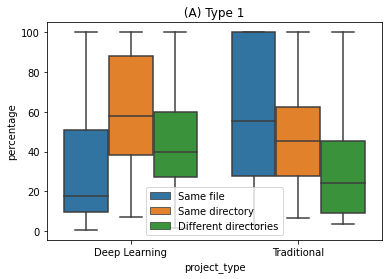

In [70]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=Type1_percentage, 
                              showfliers=False, hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='lower center')
plt.title(' (A) Type 1 ')

In [71]:
Type1_percentage

,repoName,project_type,clone_type,location,total_locc_Type1,locc,percentage
0,BerryNet,Deep Learning,Type 1,Different directories,634,188,29.652997
1,BerryNet,Deep Learning,Type 1,Same directory,634,430,67.823344
2,BerryNet,Deep Learning,Type 1,Same file,634,16,2.523659
3,DeepCTR,Deep Learning,Type 1,Same directory,1362,1362,100.000000
4,DeepLabCut,Deep Learning,Type 1,Different directories,718,503,70.055710
...,...,...,...,...,...,...,...
169,waifu2x-chainer,Deep Learning,Type 1,Same file,44,44,100.000000
170,webpy,Traditional,Type 1,Same directory,50,22,44.000000
171,webpy,Traditional,Type 1,Same file,50,28,56.000000
172,yapf,Traditional,Type 1,Same file,8,8,100.000000


##### Type2

In [72]:
Type2_size = Type2.groupby(['repoName','project_type','clone_type']).agg({'locc':'sum'}).reset_index()

In [73]:
Type2_size=Type2_size.rename(columns={"locc": "total_locc_Type2"})

In [74]:
Type2_locc = pd.merge(Type2,Type2_size[['repoName','total_locc_Type2']],how='left', on=['repoName'])

In [75]:
Type2_percentage = Type2_locc.groupby(['repoName','project_type','clone_type','location','total_locc_Type2']).agg({'locc':'sum'}).reset_index()

In [76]:
Type2_percentage['percentage']=(Type2_percentage['locc']/Type2_percentage['total_locc_Type2'])*100

Text(0.5, 1.0, ' (B) Type 2 ')

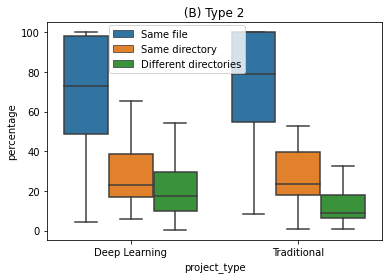

In [100]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=Type2_percentage, 
                              showfliers=False, hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best', bbox_to_anchor=(0.17, 0.51, 0.5, 0.5))
plt.title(' (B) Type 2 ')

##### Type 3

In [80]:
Type3_size = Type3.groupby(['repoName','project_type','clone_type']).agg({'locc':'sum'}).reset_index()

In [81]:
Type3_size=Type3_size.rename(columns={"locc": "total_locc_Type3"})

In [82]:
Type3_locc = pd.merge(Type3,Type3_size[['repoName','total_locc_Type3']],how='left', on=['repoName'])

In [83]:
Type3_percentage = Type3_locc.groupby(['repoName','project_type','clone_type','location','total_locc_Type3']).agg({'locc':'sum'}).reset_index()

In [84]:
Type3_percentage['percentage']=(Type3_percentage['locc']/Type3_percentage['total_locc_Type3'])*100

Text(0.5, 1.0, ' (C) Type 3 ')

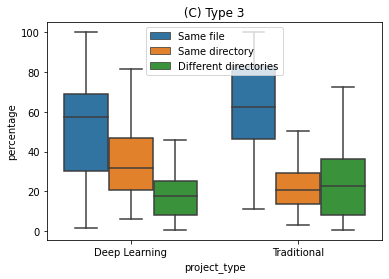

In [86]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=Type3_percentage, 
                              showfliers=False, hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='upper center')
plt.title(' (C) Type 3 ')

In [103]:
Type2_percentage

,repoName,project_type,clone_type,location,total_locc_Type2,locc,percentage
0,BerryNet,Deep Learning,Type 2,Same directory,186,168,90.322581
1,BerryNet,Deep Learning,Type 2,Same file,186,18,9.677419
2,CommonMark,Traditional,Type 2,Same file,4,4,100.000000
3,DeepCTR,Deep Learning,Type 2,Same directory,117,8,6.837607
4,DeepCTR,Deep Learning,Type 2,Same file,117,109,93.162393
...,...,...,...,...,...,...,...
195,webpy,Traditional,Type 2,Same file,76,76,100.000000
196,yapf,Traditional,Type 2,Same file,28,28,100.000000
197,yowsup,Traditional,Type 2,Different directories,478,94,19.665272
198,yowsup,Traditional,Type 2,Same directory,478,190,39.748954


In [107]:
DL_1 = Type1_percentage[Type1_percentage['project_type']=='Deep Learning']
DL_2 = Type2_percentage[Type2_percentage['project_type']=='Deep Learning']
DL_3 = Type3_percentage[Type3_percentage['project_type']=='Deep Learning']

Trad_1 = Type1_percentage[Type1_percentage['project_type']=='Traditional']
Trad_2 = Type2_percentage[Type2_percentage['project_type']=='Traditional']
Trad_3 = Type3_percentage[Type3_percentage['project_type']=='Traditional']

In [108]:
DL_SF_1 = DL_1[DL_1['location']=='Same file']
DL_SD_1 = DL_1[DL_1['location']=='Same directory']
DL_DD_1 = DL_1[DL_1['location']=='Different directories']

DL_SF_2 = DL_2[DL_2['location']=='Same file']
DL_SD_2 = DL_2[DL_2['location']=='Same directory']
DL_DD_2 = DL_2[DL_2['location']=='Different directories']

DL_SF_3 = DL_3[DL_3['location']=='Same file']
DL_SD_3 = DL_3[DL_3['location']=='Same directory']
DL_DD_3 = DL_3[DL_3['location']=='Different directories']

Trad_SF_1 = Trad_1[Trad_1['location']=='Same file']
Trad_SD_1 = Trad_1[Trad_1['location']=='Same directory']
Trad_DD_1 = Trad_1[Trad_1['location']=='Different directories']

Trad_SF_2 = Trad_2[Trad_2['location']=='Same file']
Trad_SD_2 = Trad_2[Trad_2['location']=='Same directory']
Trad_DD_2 = Trad_2[Trad_2['location']=='Different directories']

Trad_SF_3 = Trad_3[Trad_3['location']=='Same file']
Trad_SD_3 = Trad_3[Trad_3['location']=='Same directory']
Trad_DD_3 = Trad_3[Trad_3['location']=='Different directories']

In [148]:
stats.mannwhitneyu(Trad_SF_2.percentage,Trad_DD_2.percentage)

MannwhitneyuResult(statistic=51.0, pvalue=2.820776777399265e-10)

In [149]:
cliffsDelta(Trad_SF_2.percentage,Trad_DD_2.percentage)

0.907608695652174

## ALL

In [150]:
clones

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,total_locc,location
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,42,48,41,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,55,61,299,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories
2,adanet,2,../clone_code/dl/adanet/adanet/core/testing_ut...,42,49,216,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories
3,adanet,2,../clone_code/dl/adanet/adanet/subnetwork/gene...,29,36,284,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories
4,adanet,3,../clone_code/dl/adanet/adanet/experimental/ke...,114,128,342,100,Function,Type 1,Deep Learning,14,2.0,0.0,8096.0,2379,Same file
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,yowsup,77,../clone_code/trad/yowsup/yowsup/axolotl/store...,59,66,1754,87,Function,Type 3,Traditional,7,2.0,1.0,11423.0,3490,Same directory
51540,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,50,55,1740,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory
51541,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,67,72,1755,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory
51542,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,56,60,1741,71,Function,Type 3,Traditional,4,4.0,1.0,11423.0,3490,Same directory


In [151]:
clones_by_proj_loc = clones.groupby(['repoName','project_type','location']).agg({'locc':'sum'}).reset_index()

In [153]:
clones_by_proj_loc_size=clones_by_proj_loc.groupby(['repoName','project_type']).agg({'locc':'sum'}).reset_index()

In [155]:
clones_by_proj_loc_size=clones_by_proj_loc_size.rename(columns={"locc": "total_locc"})

In [156]:
clones_location = pd.merge(clones_by_proj_loc,clones_by_proj_loc_size[['repoName','total_locc']],how='left', on=['repoName'])

In [158]:
clones_location['percentage']=(clones_location['locc']/clones_location['total_locc'])*100

In [159]:
clones_location

,repoName,project_type,location,locc,total_locc,percentage
0,BerryNet,Deep Learning,Different directories,389,1993,19.518314
1,BerryNet,Deep Learning,Same directory,1552,1993,77.872554
2,BerryNet,Deep Learning,Same file,52,1993,2.609132
3,CommonMark,Traditional,Same file,4,4,100.000000
4,DeepCTR,Deep Learning,Same directory,3128,3428,91.248541
...,...,...,...,...,...,...
286,yapf,Traditional,Same directory,879,2750,31.963636
287,yapf,Traditional,Same file,1853,2750,67.381818
288,yowsup,Traditional,Different directories,1252,3377,37.074326
289,yowsup,Traditional,Same directory,1613,3377,47.764288


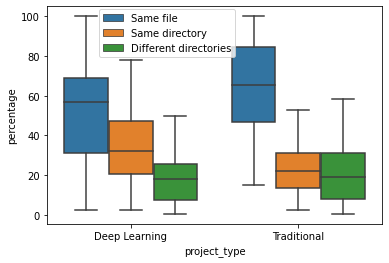

In [162]:
ml_trad_boxplot = sns.boxplot(x="project_type", y="percentage", data=clones_location, 
                              showfliers=False, hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best', bbox_to_anchor=(0.14, 0.51, 0.5, 0.5))
#plt.title(' (C) Type 3 ')

In [163]:
DL = clones_location[clones_location['project_type']=='Deep Learning']
Trad = clones_location[clones_location['project_type']=='Traditional']

In [164]:
DL_SF = DL[DL['location']=='Same file']
DL_SD = DL[DL['location']=='Same directory']
DL_DD = DL[DL['location']=='Different directories']

Trad_SF = Trad[Trad['location']=='Same file']
Trad_SD = Trad[Trad['location']=='Same directory']
Trad_DD = Trad[Trad['location']=='Different directories']

In [170]:
stats.mannwhitneyu(DL_SD.percentage,DL_DD.percentage)

MannwhitneyuResult(statistic=651.0, pvalue=4.794548333813683e-05)

In [169]:
cliffsDelta(DL_SD.percentage,DL_DD.percentage)

0.4577259475218659

In [175]:
stats.mannwhitneyu(Trad_SD.percentage,Trad_DD.percentage)

MannwhitneyuResult(statistic=761.0, pvalue=0.14907691431115627)

In [176]:
cliffsDelta(Trad_SD.percentage,Trad_DD.percentage)

0.13276353276353275

In [180]:
trad_sf=Trad_SF.locc.sum()
trad_sd=Trad_SD.locc.sum()
trad_dd=Trad_DD.locc.sum()
trad_total=Trad.locc.sum()

dl_sf=DL_SF.locc.sum()
dl_sd=DL_SD.locc.sum()
dl_dd=DL_DD.locc.sum()
dl_total=DL.locc.sum()

In [183]:
print('same file',trad_sf/trad_total,'same directory',trad_sd/trad_total, 'different directories',trad_dd/trad_total)

same file 0.5521605818596691 same directory 0.23541276179610462 different directories 0.21242665634422622


In [182]:
print('same file',dl_sf/dl_total,'same directory',dl_sd/dl_total, 'different directories',dl_dd/dl_total)

same file 0.4628409851815191 same directory 0.3234628373460654 different directories 0.2136961774724155


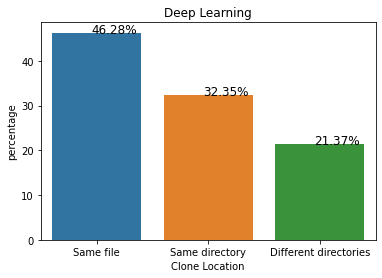

In [6]:
df = pd.DataFrame()
df['percentage'] = pd.Series([46.28, 32.35, 21.37 ])
df['Clone Location'] = pd.Series(['Same file', 'Same directory', 'Different directories'])
ax= sns.barplot(x='Clone Location',y='percentage',data=df)
ax.set_title("Deep Learning")
add_percentage(ax,df.percentage)

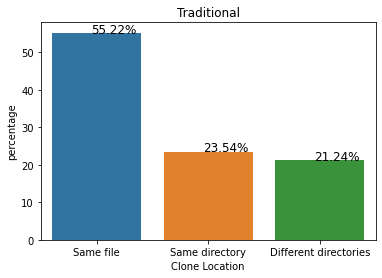

In [189]:
df = pd.DataFrame()
df['percentage'] = pd.Series([55.22, 23.54, 21.24 ])
df['Clone Location'] = pd.Series(['Same file', 'Same directory', 'Different directories'])
ax= sns.barplot(x='Clone Location',y='percentage',data=df)
ax.set_title('Traditional')
add_percentage(ax,df.percentage)

## Mean percentages DL vs Trad

In [195]:
DL_DD.describe()

,locc,total_locc,percentage
count,49.000000,49.000000,49.000000
mean,1198.408163,5480.204082,20.264359
std,2009.435813,8260.259199,16.382083
min,6.000000,65.000000,0.445800
25%,47.000000,820.000000,7.361963
50%,342.000000,1973.000000,17.886659
75%,1290.000000,4555.000000,25.619835
max,8733.000000,42941.000000,66.886206


In [198]:
Trad_SF.describe()

,locc,total_locc,percentage
count,53.000000,53.000000,53.000000
mean,2045.452830,3704.339623,65.149838
std,3475.726314,5762.784974,24.854158
min,4.000000,4.000000,14.838710
25%,312.000000,535.000000,46.758751
50%,835.000000,1112.000000,65.332188
75%,2568.000000,4139.000000,84.575390
max,17203.000000,29054.000000,100.000000


## Fragment Analysis

In [6]:
clones

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,total_locc,location
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,42,48,41,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,55,61,299,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories
2,adanet,2,../clone_code/dl/adanet/adanet/core/testing_ut...,42,49,216,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories
3,adanet,2,../clone_code/dl/adanet/adanet/subnetwork/gene...,29,36,284,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories
4,adanet,3,../clone_code/dl/adanet/adanet/experimental/ke...,114,128,342,100,Function,Type 1,Deep Learning,14,2.0,0.0,8096.0,2379,Same file
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,yowsup,77,../clone_code/trad/yowsup/yowsup/axolotl/store...,59,66,1754,87,Function,Type 3,Traditional,7,2.0,1.0,11423.0,3490,Same directory
51540,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,50,55,1740,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory
51541,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,67,72,1755,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory
51542,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,56,60,1741,71,Function,Type 3,Traditional,4,4.0,1.0,11423.0,3490,Same directory


In [7]:
clones_by_proj_frag = clones.groupby(['repoName','project_type','location']).agg({'nb_fragment':'sum'}).reset_index()

In [9]:
clones_by_proj_frag_size=clones_by_proj_frag.groupby(['repoName','project_type']).agg({'nb_fragment':'sum'}).reset_index()

In [10]:
clones_by_proj_frag_size=clones_by_proj_frag_size.rename(columns={"nb_fragment": "total_fragments"})

In [11]:
clones_location_frag = pd.merge(clones_by_proj_frag,clones_by_proj_frag_size[['repoName','total_fragments']],how='left', on=['repoName'])

In [13]:
clones_location_frag['percentage']=(clones_location_frag['nb_fragment']/clones_location_frag['total_fragments'])*100

In [14]:
clones_location_frag

,repoName,project_type,location,nb_fragment,total_fragments,percentage
0,BerryNet,Deep Learning,Different directories,156.0,650.0,24.000000
1,BerryNet,Deep Learning,Same directory,466.0,650.0,71.692308
2,BerryNet,Deep Learning,Same file,28.0,650.0,4.307692
3,CommonMark,Traditional,Same file,4.0,4.0,100.000000
4,DeepCTR,Deep Learning,Same directory,728.0,781.0,93.213828
...,...,...,...,...,...,...
286,yapf,Traditional,Same directory,1460.0,1940.0,75.257732
287,yapf,Traditional,Same file,467.0,1940.0,24.072165
288,yowsup,Traditional,Different directories,6418.0,9824.0,65.329805
289,yowsup,Traditional,Same directory,3178.0,9824.0,32.349349


In [39]:
def correct_fragment(row):
    frag=row['nb_fragment']
    if frag == 1:
        return 2
    else:
        return frag

In [40]:
clones['nb_fragment']=clones.apply(correct_fragment, axis=1)

In [44]:
DL = clones[clones['project_type']=='Deep Learning']

[Text(0, 0.5, 'Nb of Fragments'), Text(0.5, 0, 'Location Category')]

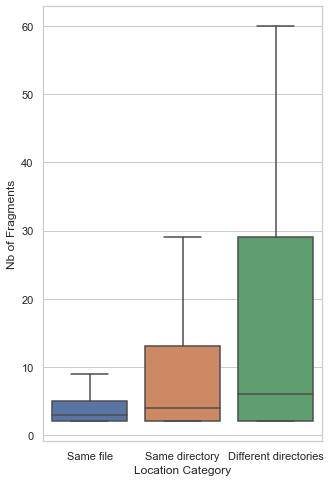

In [65]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
plt.figure(figsize=(5,8))
ml_trad_boxplot = sns.boxplot( x="location",y="nb_fragment", data=DL, order=['Same file', 'Same directory', 'Different directories']
                               ,showfliers=False)#,hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
#plt.legend(loc='best', bbox_to_anchor=(0.14, 0.51, 0.5, 0.5))
#plt.title(' (C) Type 3 ')
ml_trad_boxplot.set(xlabel='Location Category', ylabel='Nb of Fragments')

In [49]:
DL.describe()

,classid,startline,endline,pcid,similarity,locc,nb_fragment,category,total_sloc,total_locc
count,21036.000000,21036.000000,21036.00000,21036.000000,21036.000000,21036.000000,21036.00000,21036.000000,21036.000000,21036.000000
mean,103.660487,577.240730,590.30367,1285.135482,83.054906,13.062940,16.94614,0.832763,47317.616419,20302.909441
std,133.133905,1213.467252,1213.63328,1207.461904,12.159219,16.496626,49.01018,0.823348,34306.574090,14790.612329
min,1.000000,1.000000,5.00000,1.000000,70.000000,2.000000,2.00000,0.000000,13.000000,9.000000
25%,16.000000,66.000000,78.00000,362.000000,71.000000,5.000000,2.00000,0.000000,9886.000000,4948.000000
50%,52.000000,164.000000,177.00000,949.000000,80.000000,8.000000,4.00000,1.000000,38930.000000,20411.000000
75%,139.000000,476.000000,491.00000,1777.000000,100.000000,15.000000,9.00000,2.000000,83581.000000,29840.000000
max,714.000000,10084.000000,10091.00000,5585.000000,100.000000,388.000000,343.00000,2.000000,89910.000000,45682.000000


In [50]:
DL_SF = DL[DL['location']=='Same file']
DL_SD = DL[DL['location']=='Same directory']
DL_DD = DL[DL['location']=='Different directories']

In [51]:
DL_SF.describe()

,classid,startline,endline,pcid,similarity,locc,nb_fragment,category,total_sloc,total_locc
count,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.000000,9183.0,9183.000000,9183.000000
mean,150.835130,899.427529,913.277578,1470.663291,84.462376,13.850049,4.801154,0.0,52594.763694,23340.945334
std,157.466433,1562.140503,1562.198454,1313.899227,11.565929,15.398470,6.034415,0.0,36389.392451,16920.886517
min,1.000000,1.000000,5.000000,1.000000,70.000000,2.000000,2.000000,0.0,13.000000,9.000000
25%,31.000000,102.000000,115.000000,417.000000,73.000000,6.000000,2.000000,0.0,8074.000000,4948.000000
50%,100.000000,287.000000,304.000000,1072.000000,82.000000,9.000000,3.000000,0.0,73343.000000,20411.000000
75%,214.000000,818.000000,827.000000,2112.000000,100.000000,16.000000,5.000000,0.0,89910.000000,45682.000000
max,714.000000,9925.000000,9932.000000,5580.000000,100.000000,388.000000,49.000000,0.0,89910.000000,45682.000000


In [52]:
DL_SD.describe()

,classid,startline,endline,pcid,similarity,locc,nb_fragment,category,total_sloc,total_locc
count,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.0,6188.000000,6188.000000
mean,89.201034,400.857304,415.221396,1275.681319,82.910795,14.364092,13.772786,1.0,43381.239173,19452.471719
std,113.894041,918.679925,918.530497,1143.868076,12.572998,19.695486,20.416127,0.0,32902.282736,13720.082739
min,1.000000,1.000000,9.000000,1.000000,70.000000,2.000000,2.000000,1.0,13.000000,65.000000
25%,17.000000,50.000000,64.000000,371.750000,71.000000,5.000000,2.000000,1.0,9886.000000,6044.000000
50%,49.500000,123.000000,139.000000,1007.500000,80.000000,8.000000,4.000000,1.0,38930.000000,20411.000000
75%,125.000000,316.000000,333.000000,1775.250000,100.000000,16.000000,13.000000,1.0,83469.000000,29840.000000
max,710.000000,10084.000000,10091.000000,5580.000000,100.000000,346.000000,101.000000,1.0,89910.000000,45682.000000


In [53]:
DL_DD.describe()

,classid,startline,endline,pcid,similarity,locc,nb_fragment,category,total_sloc,total_locc
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5665.0,5665.000000,5665.000000
mean,42.984466,247.641306,258.007061,994.720741,80.930803,10.365755,40.099559,2.0,43063.116681,16307.185702
std,62.775917,528.927592,528.354080,1022.987512,12.320382,13.871613,87.292027,0.0,31009.117422,10532.965543
min,1.000000,1.000000,6.000000,1.000000,70.000000,2.000000,2.000000,2.0,13.000000,65.000000
25%,7.000000,48.000000,57.000000,318.000000,71.000000,4.000000,2.000000,2.0,16502.000000,4898.000000
50%,23.000000,110.000000,122.000000,665.000000,75.000000,6.000000,6.000000,2.0,34148.000000,14159.000000
75%,56.000000,245.000000,258.000000,1289.000000,100.000000,11.000000,29.000000,2.0,83469.000000,22685.000000
max,655.000000,8834.000000,8837.000000,5585.000000,100.000000,167.000000,343.000000,2.0,89910.000000,45682.000000


In [27]:
clones[clones['location']=='Same directory'].nb_fragment.min()

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,total_locc,location
6,adanet,4,../clone_code/dl/adanet/research/improve_nas/t...,42,51,348,100,Function,Type 1,Deep Learning,9,2.0,1.0,8096.0,2379,Same directory
7,adanet,4,../clone_code/dl/adanet/research/improve_nas/t...,41,50,389,100,Function,Type 1,Deep Learning,9,2.0,1.0,8096.0,2379,Same directory
8,adanet,5,../clone_code/dl/adanet/research/improve_nas/t...,52,80,349,100,Function,Type 1,Deep Learning,28,2.0,1.0,8096.0,2379,Same directory
9,adanet,5,../clone_code/dl/adanet/research/improve_nas/t...,51,79,390,100,Function,Type 1,Deep Learning,28,2.0,1.0,8096.0,2379,Same directory
10,adanet,6,../clone_code/dl/adanet/research/improve_nas/t...,158,163,355,100,Function,Type 1,Deep Learning,5,2.0,1.0,8096.0,2379,Same directory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,yowsup,77,../clone_code/trad/yowsup/yowsup/axolotl/store...,59,66,1754,87,Function,Type 3,Traditional,7,2.0,1.0,11423.0,3490,Same directory
51540,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,50,55,1740,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory
51541,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,67,72,1755,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory
51542,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,56,60,1741,71,Function,Type 3,Traditional,4,4.0,1.0,11423.0,3490,Same directory


In [24]:
sf.nb_fragment.max()

49.0

In [28]:
clones[clones['nb_fragment']==1]

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,total_locc,location
113,catalyst,5,../clone_code/dl/catalyst/catalyst/contrib/mod...,40,46,145,100,Function,Type 1,Deep Learning,6,1.0,2.0,25059.0,2207,Different directories
114,catalyst,5,../clone_code/dl/catalyst/catalyst/contrib/mod...,40,46,159,100,Function,Type 1,Deep Learning,6,1.0,2.0,25059.0,2207,Different directories
115,catalyst,6,../clone_code/dl/catalyst/catalyst/contrib/mod...,47,53,146,100,Function,Type 1,Deep Learning,6,1.0,2.0,25059.0,2207,Different directories
116,catalyst,6,../clone_code/dl/catalyst/catalyst/contrib/mod...,47,53,160,100,Function,Type 1,Deep Learning,6,1.0,2.0,25059.0,2207,Different directories
117,catalyst,7,../clone_code/dl/catalyst/catalyst/contrib/mod...,55,102,147,100,Function,Type 1,Deep Learning,47,1.0,2.0,25059.0,2207,Different directories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51471,yowsup,53,../clone_code/trad/yowsup/yowsup/layers/protoc...,8,13,1079,80,Function,Type 3,Traditional,5,1.0,1.0,11423.0,3490,Same directory
51472,yowsup,54,../clone_code/trad/yowsup/yowsup/layers/protoc...,7,21,895,73,Function,Type 3,Traditional,14,1.0,1.0,11423.0,3490,Same directory
51473,yowsup,54,../clone_code/trad/yowsup/yowsup/layers/protoc...,7,23,897,73,Function,Type 3,Traditional,16,1.0,1.0,11423.0,3490,Same directory
51517,yowsup,68,../clone_code/trad/yowsup/yowsup/layers/protoc...,7,17,1476,75,Function,Type 3,Traditional,10,1.0,1.0,11423.0,3490,Same directory


In [66]:
stats.mannwhitneyu(DL_SF.nb_fragment,DL_SD.nb_fragment)

MannwhitneyuResult(statistic=19436945.5, pvalue=3.7562492043724807e-262)

In [67]:
cliffsDelta(DL_SF.nb_fragment,DL_SD.nb_fragment)

0.3158944350740573

In [71]:
stats.mannwhitneyu(DL_SF.nb_fragment,DL_DD.nb_fragment)

MannwhitneyuResult(statistic=15464587.5, pvalue=0.0)

In [72]:
cliffsDelta(DL_SF.nb_fragment,DL_DD.nb_fragment)

0.40545622360055744

In [73]:
stats.mannwhitneyu(DL_SD.nb_fragment,DL_DD.nb_fragment)

MannwhitneyuResult(statistic=15404801.5, pvalue=3.904048948085603e-31)

In [74]:
cliffsDelta(DL_SD.nb_fragment,DL_DD.nb_fragment)

0.12110724797760777

In [76]:
clones_location_frag_dl = clones_location_frag[clones_location_frag['project_type']=='Deep Learning']

[Text(0, 0.5, '(Nb of Fragments/ Total Fragments)x100'),
 Text(0.5, 0, 'Location Category')]

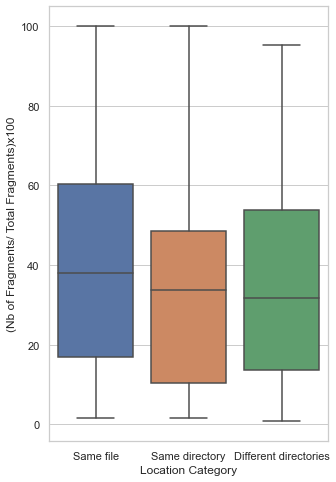

In [78]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
plt.figure(figsize=(5,8))
ml_trad_boxplot = sns.boxplot( x="location",y="percentage", data=clones_location_frag_dl, order=['Same file', 'Same directory', 'Different directories']
                               ,showfliers=False)#,hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
#plt.legend(loc='best', bbox_to_anchor=(0.14, 0.51, 0.5, 0.5))
#plt.title(' (C) Type 3 ')
ml_trad_boxplot.set(xlabel='Location Category', ylabel='(Nb of Fragments/ Total Fragments)x100')

In [79]:
SF_SF_perc =clones_location_frag_dl[clones_location_frag_dl['location']=='Same file']
SF_SD_perc =clones_location_frag_dl[clones_location_frag_dl['location']=='Same directory']
SF_DD_perc =clones_location_frag_dl[clones_location_frag_dl['location']=='different directories']

In [80]:
stats.mannwhitneyu(SF_SF_perc.percentage,SF_SD_perc.percentage)

MannwhitneyuResult(statistic=1154.5, pvalue=0.08167516660194624)

In [81]:
cliffsDelta(SF_SF_perc.percentage,SF_SD_perc.percentage)

0.1585276967930029

In [ ]:
stats.mannwhitneyu(SF_SD_perc.percentage,SF_DD_perc.percentage)
cliffsDelta(SF_SD_perc.percentage,SF_DD_perc.percentage)

## Percentage of fragment by count

In [94]:
clones = pd.read_csv('data/all_clones_categorized_size_fct.csv')

In [95]:
clones =clones.dropna()

In [96]:
dl_clones = clones[clones['project_type']=='Deep Learning']

In [97]:
clones['count_fragment']=1

In [26]:
clones_by_proj_frag = dl_clones.groupby(['repoName','project_type','location']).agg({'count_fragment':'count'}).reset_index()
clones_by_proj_frag_size=clones_by_proj_frag.groupby(['repoName','project_type']).agg({'nb_fragment':'sum'}).reset_index()
clones_by_proj_frag_size=clones_by_proj_frag_size.rename(columns={"nb_fragment": "total_fragments"})
clones_location_frag = pd.merge(clones_by_proj_frag,clones_by_proj_frag_size[['repoName','total_fragments']],how='left', on=['repoName'])
clones_location_frag['percentage']=(clones_location_frag['nb_fragment']/clones_location_frag['total_fragments'])*100

In [98]:
clones_by_proj_frag = clones.groupby(['repoName','project_type','location']).agg({'count_fragment':'count'}).reset_index()

In [99]:
clones_by_proj_frag

,repoName,project_type,location,count_fragment
0,BerryNet,Deep Learning,Different directories,48
1,BerryNet,Deep Learning,Same directory,105
2,BerryNet,Deep Learning,Same file,14
3,CommonMark,Traditional,Same file,2
4,DeepCTR,Deep Learning,Same directory,78
...,...,...,...,...
286,yapf,Traditional,Same directory,90
287,yapf,Traditional,Same file,131
288,yowsup,Traditional,Different directories,289
289,yowsup,Traditional,Same directory,270


In [100]:
clones_by_proj_frag_size=clones_by_proj_frag.groupby(['repoName','project_type']).agg({'count_fragment':'sum'}).reset_index()

In [101]:
clones_by_proj_frag_size=clones_by_proj_frag_size.rename(columns={"count_fragment": "total_fragments"})

In [102]:
clones_location_frag = pd.merge(clones_by_proj_frag,clones_by_proj_frag_size[['repoName','total_fragments']],how='left', on=['repoName'])

In [103]:
clones_location_frag['percentage']=(clones_location_frag['count_fragment']/clones_location_frag['total_fragments'])*100

In [104]:
clones_location_frag

,repoName,project_type,location,count_fragment,total_fragments,percentage
0,BerryNet,Deep Learning,Different directories,48,167,28.742515
1,BerryNet,Deep Learning,Same directory,105,167,62.874251
2,BerryNet,Deep Learning,Same file,14,167,8.383234
3,CommonMark,Traditional,Same file,2,2,100.000000
4,DeepCTR,Deep Learning,Same directory,78,99,78.787879
...,...,...,...,...,...,...
286,yapf,Traditional,Same directory,90,226,39.823009
287,yapf,Traditional,Same file,131,226,57.964602
288,yowsup,Traditional,Different directories,289,635,45.511811
289,yowsup,Traditional,Same directory,270,635,42.519685


[Text(0, 0.5, 'Percentage (%) of Cloned Fragments'),
 Text(0.5, 0, 'Location Category')]

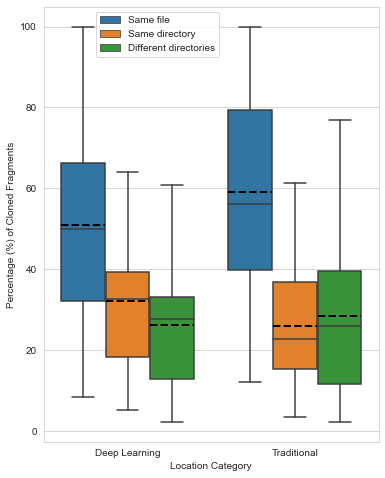

In [119]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
meanlineprops = dict(linestyle='--', linewidth=2., color='black')
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
ml_trad_boxplot = sns.boxplot( x="project_type",y="percentage", meanprops=meanlineprops,showmeans=True,
                              meanline=True
                    ,data=clones_location_frag,  hue="location", hue_order=['Same file', 'Same directory', 'Different directories']
                               ,showfliers=False)#,hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='best', bbox_to_anchor=(0.14, 0.5, 0.5, 0.5))
#plt.title(' (C) Type 3 ')
ml_trad_boxplot.set(xlabel='Location Category', ylabel='Percentage (%) of Cloned Fragments')

In [120]:
clones_location_frag_DL=clones_location_frag[clones_location_frag['project_type']=='Deep Learning']
clones_location_frag_Trad=clones_location_frag[clones_location_frag['project_type']=='Traditional']

In [121]:
DL_SF_perc =clones_location_frag_DL[clones_location_frag_DL['location']=='Same file']
DL_SD_perc =clones_location_frag_DL[clones_location_frag_DL['location']=='Same directory']
DL_DD_perc =clones_location_frag_DL[clones_location_frag_DL['location']=='Different directories']

Trad_SF_perc =clones_location_frag_Trad[clones_location_frag_Trad['location']=='Same file']
Trad_SD_perc =clones_location_frag_Trad[clones_location_frag_Trad['location']=='Same directory']
Trad_DD_perc =clones_location_frag_Trad[clones_location_frag_Trad['location']=='Different directories']

In [ ]:
DL_SF_perc

In [ ]:
stats.mannwhitneyu(SF_SD_perc.percentage,SF_DD_perc.percentage)
cliffsDelta(SF_SD_perc.percentage,SF_DD_perc.percentage)

In [72]:
stats.mannwhitneyu(SF_perc.percentage,SD_perc.percentage)

MannwhitneyuResult(statistic=761.5, pvalue=4.45779462038993e-05)

In [73]:
cliffsDelta(SF_perc.percentage,SD_perc.percentage)

0.44497084548104954

In [74]:
stats.mannwhitneyu(SF_perc.percentage,DD_perc.percentage)

MannwhitneyuResult(statistic=581.5, pvalue=1.9428818038180478e-07)

In [75]:
cliffsDelta(SF_perc.percentage,DD_perc.percentage)

0.5761661807580175

In [76]:
stats.mannwhitneyu(SD_perc.percentage,DD_perc.percentage)

MannwhitneyuResult(statistic=938.5, pvalue=0.03158277626612023)

In [77]:
cliffsDelta(SD_perc.percentage,DD_perc.percentage)

0.2182423990004165

In [78]:
DL_SF_perc.describe()

,count_fragment,total_fragments,percentage
count,56.000000,56.000000,56.000000
mean,163.982143,375.571429,50.809821
std,402.429192,650.653486,24.969664
min,2.000000,2.000000,8.383234
25%,23.250000,55.250000,32.215138
50%,52.000000,141.000000,49.977662
75%,127.250000,361.250000,66.354167
max,2875.000000,3943.000000,100.000000


In [126]:
DL_SD_perc.describe()

,count_fragment,total_fragments,percentage
count,49.000000,49.000000,49.000000
mean,126.285714,426.326531,32.038824
std,187.739403,681.156810,18.481479
min,2.000000,4.000000,5.128205
25%,16.000000,78.000000,18.357934
50%,55.000000,167.000000,32.600000
75%,137.000000,372.000000,39.175258
max,843.000000,3943.000000,100.000000


In [127]:
DL_DD_perc.describe()

,count_fragment,total_fragments,percentage
count,49.000000,49.000000,49.000000
mean,115.612245,423.979592,26.219339
std,170.176357,682.408220,16.107647
min,2.000000,9.000000,2.150538
25%,8.000000,74.000000,12.771739
50%,43.000000,167.000000,27.586207
75%,130.000000,372.000000,33.135509
max,650.000000,3943.000000,60.912052


In [125]:
Trad_SF_perc.describe()

,count_fragment,total_fragments,percentage
count,53.00000,53.000000,53.000000
mean,197.09434,443.320755,59.109142
std,294.68975,617.170553,25.689788
min,2.00000,2.000000,11.968504
25%,26.00000,78.000000,39.768340
50%,89.00000,140.000000,56.097561
75%,204.00000,566.000000,79.365079
max,1439.00000,2662.000000,100.000000


In [124]:
Trad_SD_perc.describe()

,count_fragment,total_fragments,percentage
count,45.000000,45.000000,45.000000
mean,127.000000,520.266667,25.856752
std,170.476471,640.336502,13.793323
min,3.000000,25.000000,3.296703
25%,21.000000,115.000000,15.366972
50%,64.000000,233.000000,22.790698
75%,147.000000,645.000000,36.845593
max,815.000000,2662.000000,61.290323


In [123]:
Trad_DD_perc.describe()

,count_fragment,total_fragments,percentage
count,39.000000,39.000000,39.000000
mean,188.128205,581.230769,28.299017
std,231.177214,667.613837,21.457280
min,2.000000,2.000000,2.197802
25%,15.000000,118.000000,11.460464
50%,45.000000,252.000000,25.806452
75%,301.000000,899.500000,39.505237
max,789.000000,2662.000000,100.000000


In [129]:
stats.mannwhitneyu(DL_SF_perc.percentage,Trad_SF_perc.percentage)

MannwhitneyuResult(statistic=1211.0, pvalue=0.04914685609895104)

In [130]:
cliffsDelta(DL_SF_perc.percentage,Trad_SF_perc.percentage)

0.18396226415094338

### Fragment and Clone Type

In [ ]:
clones_by_proj_frag = dl_clones.groupby(['repoName','project_type','location']).agg({'count_fragment':'count'}).reset_index()
clones_by_proj_frag_size=clones_by_proj_frag.groupby(['repoName','project_type']).agg({'nb_fragment':'sum'}).reset_index()
clones_by_proj_frag_size=clones_by_proj_frag_size.rename(columns={"nb_fragment": "total_fragments"})
clones_location_frag = pd.merge(clones_by_proj_frag,clones_by_proj_frag_size[['repoName','total_fragments']],how='left', on=['repoName'])
clones_location_frag['percentage']=(clones_location_frag['nb_fragment']/clones_location_frag['total_fragments'])*100

In [131]:
clones

,repoName,classid,file,startline,endline,pcid,similarity,granularity,clone_type,project_type,locc,nb_fragment,category,total_sloc,total_locc,location,count_fragment
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,42,48,41,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories,1
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,55,61,299,100,Function,Type 1,Deep Learning,6,2.0,2.0,8096.0,2379,Different directories,1
2,adanet,2,../clone_code/dl/adanet/adanet/core/testing_ut...,42,49,216,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories,1
3,adanet,2,../clone_code/dl/adanet/adanet/subnetwork/gene...,29,36,284,100,Function,Type 1,Deep Learning,7,2.0,2.0,8096.0,2379,Different directories,1
4,adanet,3,../clone_code/dl/adanet/adanet/experimental/ke...,114,128,342,100,Function,Type 1,Deep Learning,14,2.0,0.0,8096.0,2379,Same file,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,yowsup,77,../clone_code/trad/yowsup/yowsup/axolotl/store...,59,66,1754,87,Function,Type 3,Traditional,7,2.0,1.0,11423.0,3490,Same directory,1
51540,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,50,55,1740,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory,1
51541,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,67,72,1755,71,Function,Type 3,Traditional,5,4.0,1.0,11423.0,3490,Same directory,1
51542,yowsup,78,../clone_code/trad/yowsup/yowsup/axolotl/store...,56,60,1741,71,Function,Type 3,Traditional,4,4.0,1.0,11423.0,3490,Same directory,1


In [132]:
Type1_frag= clones[clones['clone_type']=='Type 1']
Type2_frag= clones[clones['clone_type']=='Type 2']
Type3_frag= clones[clones['clone_type']=='Type 3']

In [133]:
Type1_group_frag = Type1_frag.groupby(['repoName','project_type','location']).agg({'count_fragment':'count'}).reset_index()

In [134]:
Type1_group_frag

,repoName,project_type,location,count_fragment
0,BerryNet,Deep Learning,Different directories,26
1,BerryNet,Deep Learning,Same directory,27
2,BerryNet,Deep Learning,Same file,4
3,DeepCTR,Deep Learning,Same directory,16
4,DeepLabCut,Deep Learning,Different directories,54
...,...,...,...,...
169,waifu2x-chainer,Deep Learning,Same file,4
170,webpy,Traditional,Same directory,2
171,webpy,Traditional,Same file,6
172,yapf,Traditional,Same file,2


In [135]:
Type1_group_frag_size=Type1_group_frag.groupby(['repoName','project_type']).agg({'count_fragment':'sum'}).reset_index()
Type1_group_frag_size=Type1_group_frag_size.rename(columns={"count_fragment": "total_fragments"})

In [136]:
Type1_group_frag = pd.merge(Type1_group_frag,Type1_group_frag_size[['repoName','total_fragments']],how='left', on=['repoName'])
Type1_group_frag['percentage']=(Type1_group_frag['count_fragment']/Type1_group_frag['total_fragments'])*100

[Text(0, 0.5, 'Percentage (%) of Cloned Fragments'),
 Text(0.5, 0, 'Location Category')]

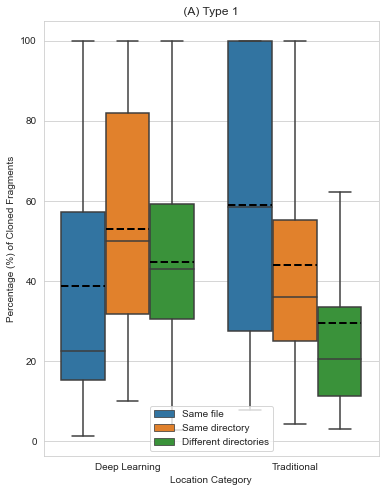

In [140]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
meanlineprops = dict(linestyle='--', linewidth=2., color='black')
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
ml_trad_boxplot = sns.boxplot( x="project_type",y="percentage", meanprops=meanlineprops,showmeans=True,
                              meanline=True
                    ,data=Type1_group_frag,  hue="location", hue_order=['Same file', 'Same directory', 'Different directories']
                               ,showfliers=False)#,hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='lower center')#, bbox_to_anchor=(0.14, 0.6, 0.5, 0.5))
plt.title(' (A) Type 1 ')
ml_trad_boxplot.set(xlabel='Location Category', ylabel='Percentage (%) of Cloned Fragments')

In [141]:
Type2_group_frag = Type2_frag.groupby(['repoName','project_type','location']).agg({'count_fragment':'count'}).reset_index()
Type2_group_frag_size=Type2_group_frag.groupby(['repoName','project_type']).agg({'count_fragment':'sum'}).reset_index()
Type2_group_frag_size=Type2_group_frag_size.rename(columns={"count_fragment": "total_fragments"})
Type2_group_frag = pd.merge(Type2_group_frag,Type2_group_frag_size[['repoName','total_fragments']],how='left', on=['repoName'])
Type2_group_frag['percentage']=(Type2_group_frag['count_fragment']/Type2_group_frag['total_fragments'])*100

[Text(0, 0.5, 'Percentage (%) of Cloned Fragments'),
 Text(0.5, 0, 'Location Category')]

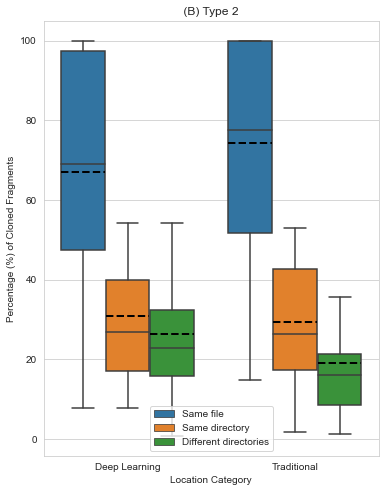

In [142]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
meanlineprops = dict(linestyle='--', linewidth=2., color='black')
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
ml_trad_boxplot = sns.boxplot( x="project_type",y="percentage", meanprops=meanlineprops,showmeans=True,
                              meanline=True
                    ,data=Type2_group_frag,  hue="location", hue_order=['Same file', 'Same directory', 'Different directories']
                               ,showfliers=False)#,hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='lower center')#, bbox_to_anchor=(0.14, 0.6, 0.5, 0.5))
plt.title(' (B) Type 2 ')
ml_trad_boxplot.set(xlabel='Location Category', ylabel='Percentage (%) of Cloned Fragments')

In [143]:
Type3_group_frag = Type3_frag.groupby(['repoName','project_type','location']).agg({'count_fragment':'count'}).reset_index()
Type3_group_frag_size=Type3_group_frag.groupby(['repoName','project_type']).agg({'count_fragment':'sum'}).reset_index()
Type3_group_frag_size=Type3_group_frag_size.rename(columns={"count_fragment": "total_fragments"})
Type3_group_frag = pd.merge(Type3_group_frag,Type3_group_frag_size[['repoName','total_fragments']],how='left', on=['repoName'])
Type3_group_frag['percentage']=(Type3_group_frag['count_fragment']/Type3_group_frag['total_fragments'])*100

[Text(0, 0.5, 'Percentage (%) of Cloned Fragments'),
 Text(0.5, 0, 'Location Category')]

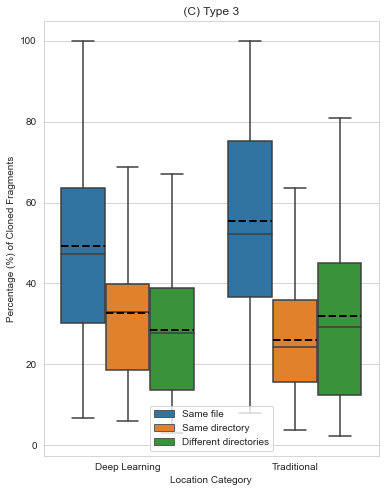

In [144]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
meanlineprops = dict(linestyle='--', linewidth=2., color='black')
sns.set_style("whitegrid")
plt.figure(figsize=(6,8))
ml_trad_boxplot = sns.boxplot( x="project_type",y="percentage", meanprops=meanlineprops,showmeans=True,
                              meanline=True
                    ,data=Type3_group_frag,  hue="location", hue_order=['Same file', 'Same directory', 'Different directories']
                               ,showfliers=False)#,hue='location', hue_order=['Same file', 'Same directory', 'Different directories'])
#ml_trad_boxplot.set_yscale("log")
plt.legend(loc='lower center')#, bbox_to_anchor=(0.14, 0.6, 0.5, 0.5))
plt.title(' (C) Type 3 ')
ml_trad_boxplot.set(xlabel='Location Category', ylabel='Percentage (%) of Cloned Fragments')